In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
n_samples = 2000
constraint = 'contiguous'
sloth_mapping = pd.read_csv(f'test_mapping_{constraint}_wiki_{n_samples}samples.csv', sep=';')
sloth_LCS = pd.read_csv(f'test_sloth_{constraint}_wiki_{n_samples}samples.csv', sep=';')

# sloth_mapping = sloth_mapping[sloth_mapping['algo'] == 'e']
# sloth_LCS = sloth_LCS.loc[sloth_mapping.index]
# sloth_LCS = sloth_LCS[sloth_LCS['algo'] == 'e']
# sloth_mapping = sloth_mapping.loc[sloth_LCS.index]

print(f'len(sloth_mapping): {len(sloth_mapping)}')
print(f'len(sloth_LCS): {len(sloth_LCS)}')

len(sloth_mapping): 2000
len(sloth_LCS): 2000


In [23]:
sloth_mapping = sloth_mapping[sloth_LCS['a%'] == sloth_mapping['a%']]
sloth_LCS = sloth_LCS.iloc[sloth_mapping.index]

In [22]:
def summary_stats(data):
    return {
        "min": round(np.min(data), 3),
        "max": round(np.max(data), 3),
        "mean": round(np.mean(data), 3),
        "std_dev": round(np.std(data), 3),
        "positive_ratio": round(np.sum(data > 0) / len(data), 3),
        "negative_ratio": round(np.sum(data < 0) / len(data), 3),
        "zero_ratio": round(np.sum(data == 0) / len(data), 3),
    }

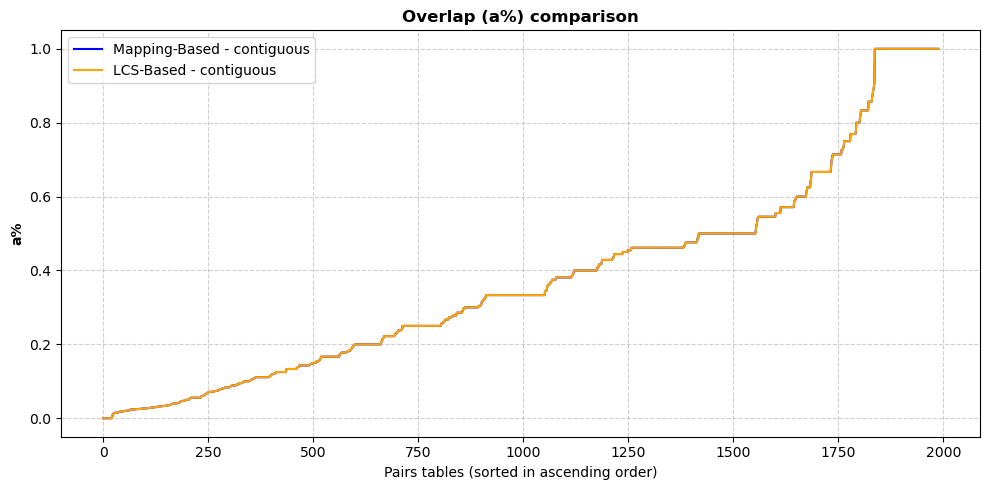

In [24]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_LCS_ord = sloth_LCS.sort_values(by='a%')
sloth_mapping_ord = sloth_mapping.loc[sloth_LCS_ord.index]
# sloth_ord = sloth.sort_values(by='a%')
plt.plot(sloth_mapping_ord['a%'].values, color='blue', label=f'Mapping-Based - {constraint}', markersize=4)
plt.plot(sloth_LCS_ord['a%'].values, color='orange', label=f'LCS-Based - {constraint}', markersize=4)

plt.title("Overlap (a%) comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("a%", fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
print("=== SLOTH Mapping ===")
sloth_mapping_stats = summary_stats(sloth_mapping['a%'].values)
for k, v in sloth_mapping_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH LCS ===")
sloth_LCS_stats = summary_stats(sloth_LCS['a%'].values)
for k, v in sloth_LCS_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH Mapping - SLOTH LCS) ===")
delta = sloth_mapping['a%'].values - sloth_LCS['a%'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH Mapping ===
min: 0.0
max: 1.0
mean: 0.374
std_dev: 0.272
positive_ratio: 0.989
negative_ratio: 0.0
zero_ratio: 0.011

=== SLOTH LCS ===
min: 0.0
max: 1.0
mean: 0.374
std_dev: 0.272
positive_ratio: 0.989
negative_ratio: 0.0
zero_ratio: 0.011

=== GAP (SLOTH Mapping - SLOTH LCS) ===
min: 0.0
max: 0.0
mean: 0.0
std_dev: 0.0
positive_ratio: 0.0
negative_ratio: 0.0
zero_ratio: 1.0


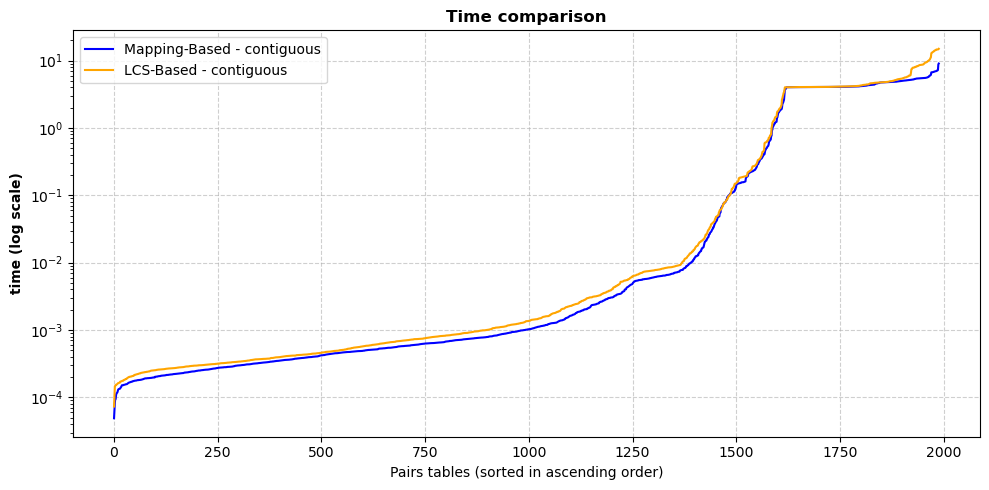

In [27]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_LCS_ord = sloth_LCS.sort_values(by='time')
sloth_mapping_ord = sloth_mapping.sort_values(by='time')
# sloth_ord = sloth.loc[sloth_constr_ord.index]

plt.plot(sloth_mapping_ord['time'].values, color='blue', label=f'Mapping-Based - {constraint}', markersize=4)
plt.plot(sloth_LCS_ord['time'].values, color='orange', label=f'LCS-Based - {constraint}', markersize=4)
plt.title("Time comparison", fontweight='bold')
plt.yscale('log')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.ylabel("time (log scale)", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [29]:
print("=== SLOTH mapping ===")
sloth_stats = summary_stats(sloth_mapping['time'].values)
for k, v in sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH LCS ===")
sloth_LCS_stats = summary_stats(sloth_LCS['time'].values)
for k, v in sloth_LCS_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH mapping - SLOTH LCS) ===")
delta = sloth_mapping['time'].values - sloth_LCS['time'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH mapping ===
min: 0.0
max: 9.044
mean: 0.905
std_dev: 1.824
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== SLOTH LCS ===
min: 0.0
max: 14.976
mean: 1.077
std_dev: 2.401
positive_ratio: 1.0
negative_ratio: 0.0
zero_ratio: 0.0

=== GAP (SLOTH mapping - SLOTH LCS) ===
min: -8.193
max: 0.314
mean: -0.173
std_dev: 0.869
positive_ratio: 0.247
negative_ratio: 0.752
zero_ratio: 0.001


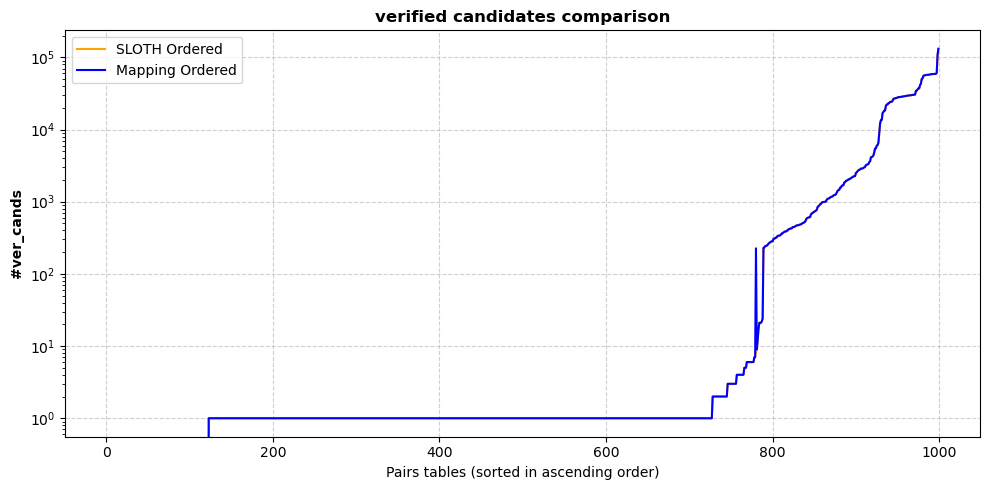

In [21]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
cands_sloth_LCS = sloth_LCS.sort_values(by='ver_cands')
cands_sloth_mapping = sloth_mapping.loc[cands_sloth_LCS.index]
# cands_sloth_mapping = sloth_mapping.sort_values(by='ver_cands')
plt.plot(cands_sloth_LCS['ver_cands'].values, color='orange', label='SLOTH Ordered', markersize=4)
plt.plot(cands_sloth_mapping['ver_cands'].values, color='blue', label='Mapping Ordered', markersize=4)
plt.title("verified candidates comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.yscale('log')
plt.ylabel("#ver_cands", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [22]:
print("=== SLOTH ===")
cands_sloth_stats = summary_stats(sloth_mapping['ver_cands'].values)
for k, v in cands_sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH-C ===")
cands_sloth_c_stats = summary_stats(sloth_LCS['ver_cands'].values)
for k, v in cands_sloth_c_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH - SLOTH-C) ===")
delta = sloth_mapping['ver_cands'].values - sloth_LCS['ver_cands'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH ===
min: 0
max: 131231
mean: 2897.408
std_dev: 11067.02
positive_ratio: 0.877
negative_ratio: 0.0
zero_ratio: 0.123

=== SLOTH-C ===
min: 0
max: 131231
mean: 2897.236
std_dev: 11067.069
positive_ratio: 0.877
negative_ratio: 0.0
zero_ratio: 0.123

=== GAP (SLOTH - SLOTH-C) ===
min: -16
max: 218
mean: 0.172
std_dev: 6.918
positive_ratio: 0.001
negative_ratio: 0.012
zero_ratio: 0.987


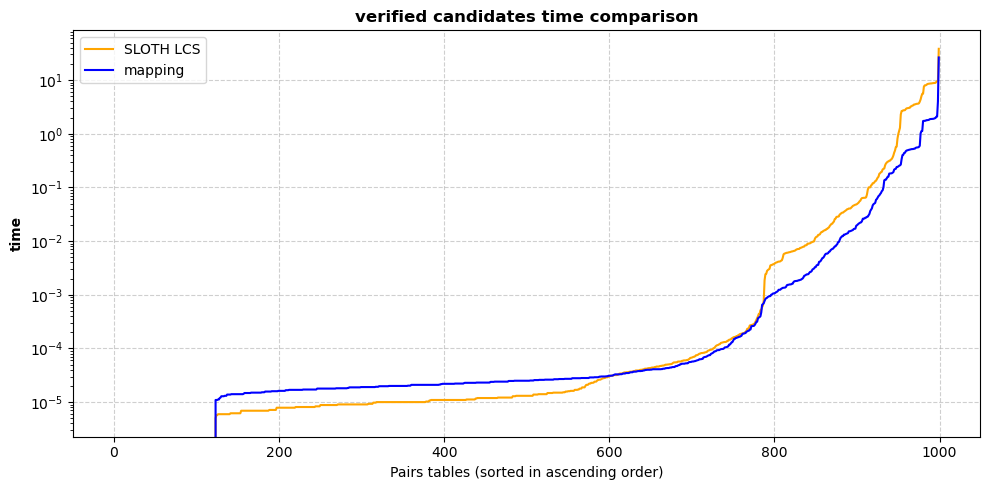

In [23]:
# Imposta il grafico
plt.figure(figsize=(10, 5))
sloth_LCS_ord = sloth_LCS.sort_values(by='ver_time')
sloth_mapping_ord = sloth_mapping.sort_values(by='ver_time')
plt.plot(sloth_LCS_ord['ver_time'].values, color='orange', label='SLOTH LCS', markersize=4)
plt.plot(sloth_mapping_ord['ver_time'].values, color='blue', label='mapping', markersize=4)
plt.title("verified candidates time comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.yscale('log')
plt.ylabel("time", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

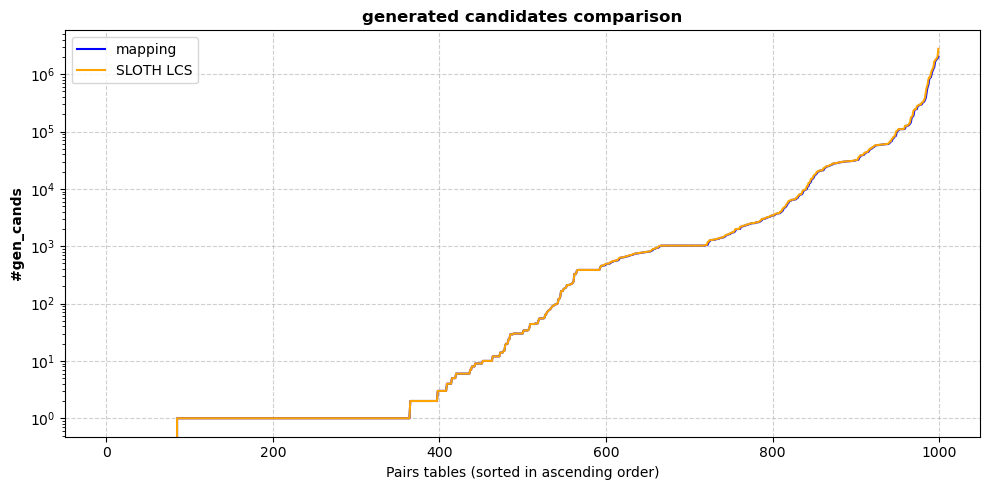

In [24]:
plt.figure(figsize=(10, 5))
cands_sloth_LCS = sloth_LCS.sort_values(by='gen_cands')
cands_sloth_mapping = sloth_mapping.sort_values(by='gen_cands')
plt.plot(cands_sloth_mapping['gen_cands'].values, color='blue', label='mapping', markersize=4)
plt.plot(cands_sloth_LCS['gen_cands'].values, color='orange', label='SLOTH LCS', markersize=4)
plt.title("generated candidates comparison", fontweight='bold')
plt.xlabel("Pairs tables (sorted in ascending order)")
plt.yscale('log')
plt.ylabel("#gen_cands", fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
print("=== SLOTH ===")
cands_sloth_stats = summary_stats(sloth['gen_cands'].values)
for k, v in cands_sloth_stats.items():
    print(f"{k}: {v}")

print("\n=== SLOTH-C ===")
cands_sloth_c_stats = summary_stats(sloth_constr['gen_cands'].values)
for k, v in cands_sloth_c_stats.items():
    print(f"{k}: {v}")

print("\n=== GAP (SLOTH - SLOTH-C) ===")
delta = sloth['gen_cands'].values - sloth_constr['gen_cands'].values
gap_stats = summary_stats(delta)
for k, v in gap_stats.items():
    print(f"{k}: {v}")

=== SLOTH ===
min: 0
max: 1553749
mean: 29214.814
std_dev: 127348.946
positive_ratio: 0.952
negative_ratio: 0.0
zero_ratio: 0.048

=== SLOTH-C ===
min: 0
max: 1880032
mean: 27805.066
std_dev: 142493.34
positive_ratio: 0.906
negative_ratio: 0.0
zero_ratio: 0.094

=== GAP (SLOTH - SLOTH-C) ===
min: -1876360
max: 1553383
mean: 1409.749
std_dev: 185711.255
positive_ratio: 0.372
negative_ratio: 0.307
zero_ratio: 0.32
